## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into multiple DFs and visulize it. 

* We get an initial overview of the data and their anomalies. 
* We select the relevant points for the upcoming tasks and compare them in different situations.
* We carry out an initial univariate outlier detection, in which we identify and visualize abnormalities.

Requirements
* .csv-Files

In [2]:
csvFilesPath = os.getcwd()+"/csv_files/"
csvFiles = os.listdir(csvFilesPath)
for fileName in csvFiles:
    pre, ext = os.path.splitext(fileName)
    print(pre)

Joggen_8
Joggen_9
Joggen_10
Gehen_9
Gehen_8
Laufen_9
Laufen_8
Gehen_3
Laufen_5
Laufen_4
Gehen_2
Laufen_6
Laufen_7
Gehen_1
Gehen_5
Laufen_3
Laufen_2
Gehen_4
Gehen_6
Laufen_1
Gehen_7
Joggen_1
Laufen_10
Joggen_2
Joggen_3
Gehen_10
Joggen_7
Joggen_6
Joggen_4
Joggen_5


In [3]:
RUN = "Joggen_8" 

## Setup

In [4]:
import os
import pandas as pd
import numpy as np
import warnings
import pickle
import statistics
warnings.filterwarnings('ignore')

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [5]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    # if "Joggen" in pre:
    #     df = pd.read_csv(file)
    #     df_dict_all[pre] = df
    #     if len(df) < 1798:
    #         print(pre)

    df = pd.read_csv(file)
    df_dict_all[pre] = df
    if len(df) < 1798:
        print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

30 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
2212770 DataCells


* 10 Runner
* 3 paces per runner
* 2 perspectives per pace 
> 10 x 3 x 2 = 60 Dataframes


* 1800 Frames per Dataframe --> 1800 Frames / 60 seconds = 30 Frames per Second
* 132 Columns per Dataframe --> 33 Pivot points x 4 Columns per Pivotpoint


> Für die 33 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 



In [6]:
df_dict_all.keys()

dict_keys(['Joggen_8', 'Joggen_9', 'Joggen_10', 'Gehen_9', 'Gehen_8', 'Laufen_9', 'Laufen_8', 'Gehen_3', 'Laufen_5', 'Laufen_4', 'Gehen_2', 'Laufen_6', 'Laufen_7', 'Gehen_1', 'Gehen_5', 'Laufen_3', 'Laufen_2', 'Gehen_4', 'Gehen_6', 'Laufen_1', 'Gehen_7', 'Joggen_1', 'Laufen_10', 'Joggen_2', 'Joggen_3', 'Gehen_10', 'Joggen_7', 'Joggen_6', 'Joggen_4', 'Joggen_5'])

In [7]:
df = df_dict_all[RUN]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.723596,0.479980,0.548917,0.000132,0.707509,0.483800,0.429650,0.000954,0.715222,...,0.451056,0.284575,0.675060,0.196673,0.528145,0.014531,0.672883,0.235611,0.458082,0.171472
1,0,0.726037,0.485146,0.546191,0.000191,0.729643,0.484793,0.426466,0.001010,0.694822,...,0.453923,0.266858,0.656864,0.199956,0.528071,0.014149,0.706482,0.231654,0.464884,0.160278
2,-1,0.728443,0.490090,0.539032,0.000221,0.729829,0.488658,0.418231,0.001000,0.679164,...,0.456694,0.246597,0.608449,0.200440,0.528359,0.013111,0.793645,0.230427,0.469855,0.146988
3,-2,0.737002,0.492356,0.537111,0.000274,0.730903,0.491005,0.418867,0.001008,0.679115,...,0.466343,0.226680,0.559390,0.203368,0.530204,0.012175,0.878009,0.234410,0.474930,0.133878
4,-3,0.736251,0.492395,0.536214,0.000307,0.728697,0.491374,0.424980,0.000988,0.673556,...,0.481210,0.207875,0.512329,0.210789,0.536911,0.011169,0.909445,0.241756,0.484863,0.121702


## Analyse und Visualisierung

### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="x_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="x_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [9]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

## Functions for Calculation

In [10]:
def getPointsForAngleDirection(x_points,y_points):
        for i, y in enumerate(y_points):
            if y == max(y_points):
                x = x_points[i]
                return (x,y)


def intersection_points(slope, intercept, x0, y0, radius):
    x_points = []
    y_points = []

    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return x_points, y_points

def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
    return theta

import matplotlib.pyplot as plt
import numpy as np

def calcAngle(frame):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1

    r = 0.2
    
    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    #If blue line starts left from orange line (above) the angle should be negative
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2

    theta_list = []

    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
    
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:

            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # supination = True
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    if supination == True:
        angle_in_degree = angle_in_degree*-1
    return angle_in_degree

import matplotlib.pyplot as plt
import numpy as np

def drawAngle(frame, printMode = True):
    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    l = np.linspace(-6, 6, 100)
    
    plt.figure(figsize=(8, 8))

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title('Plot an angle using Python')
    plt.plot(l, l*a1+b1)
    plt.plot(l, l*a2+b2)
    
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue')

    plt.scatter(knee_x, knee_y, color='blue')
    plt.scatter(ankle_x, ankle_y, color='green')
    plt.scatter(heel_x, heel_y, color='violet')
    plt.text(knee_x, knee_y, 'knee', color='blue')
    plt.text(ankle_x, ankle_y, 'ankle', color='green')
    plt.text(heel_x, heel_y, 'heel', color='violet')

    plt.axhline(y=foot_y, color='black', linestyle='dotted')
    #plt.text(foot_y, 0, 'heel', color='violet')

    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.2
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    plt.plot(x1, x2, color='green', linestyle='dotted')

    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True
    
    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2
    
    plt.scatter(x_points[1], y_points[1], color='crimson')
    plt.scatter(x_points[2], y_points[2], color='crimson')
    plt.scatter(x_points[3], y_points[3], color='crimson')
    plt.scatter(x_points[0], y_points[0], color='crimson')
    
    plt.text(x_points[1], y_points[1], '  P1', color='black')
    plt.text(x_points[2], y_points[2], '  P2', color='black')
    plt.text(x_points[3], y_points[3], '  P3', color='black')
    plt.text(x_points[0], y_points[0], '  P0', color='black')
    
    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]

        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
            print(theta_list[3])

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund

    theta = np.linspace(p1, p2, 100)
    
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    
    plt.plot(x1, x2, color='black')
    
    mid_angle = (p1 + p2) / 2.0
    
    x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
    y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
    
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    # Angle negative
    if supination == True:
        angle_in_degree = angle_in_degree*-1
    
    plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
    
    plt.scatter(x_points[1], y_points[1], color='red')
    plt.scatter(x_points[2], y_points[2], color='red')
    plt.scatter(x_points[3], y_points[3], color='red')
    plt.scatter(x_points[0], y_points[0], color='red')

    if printMode == True:
        plt.show()


def checkThresholds(i, step_average, printMode=True):
    result = ""
    if step_average >= THRESHOLD_PRONATION[0] and step_average <= THRESHOLD_PRONATION[1]:
        pronation_list.append(frame_list_all[i])
        result = "Pronation"

    elif step_average > THRESHOLD_PRONATION_STRONG:
        pronation_strong_list.append(frame_list_all[i])
        result = "Strong Pronation"
    
    elif step_average <= THRESHOLD_SUPINATION:
        supination_list.append(frame_list_all[i])
        result = "Supination"
    else:
        neutral_list.append(frame_list_all[i])
        result = "Neutral"

    if printMode == True:
        print(f'{result} in Frames {frame_list_all[i]} with a Mean Angle of {np.round(step_average,2)}')

    return result

def green(txt):
    return f"\x1b[32m{txt}\x1b[0m"
def red(txt):
    return f"\x1b[31m{txt}\x1b[0m"
def blue(txt):
    return f"\x1b[36m{txt}\x1b[0m"
def bold(txt):
        return f"\x1b[1m{txt}\x1b[0m"

def saveAnalysis(run, model_obj):
    an_obj = model_obj
    file = open("analysis_results/"+run, "wb")
    pickle.dump(an_obj, file)
    file.close()

def loadAnalysis(run):
    file_to_read = open("analysis_results/"+run, "rb")
    loaded_object = pickle.load(file_to_read)
    file_to_read.close()
    #print(loaded_object)
    return loaded_object


## Bestimmung der Frames des Auftritts

Alle Geschwindigkeiten der Läufer: 1, 4, 5, 7 

Detecting Frames where Foot_index_y higher or similar to heel_y

In [11]:
frame_list_all = []
frame_list_step = []

for frame in range(0, len(df)):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    if foot_y >= heel_y:
        if frame_list_step == []:
            frame_list_step.append(frame)
        else:
            if frame_list_step[-1] == frame-1:
                frame_list_step.append(frame)
            else:
                if len(frame_list_step) > 2:
                    frame_list_all.append(frame_list_step)
                    frame_list_step = [frame] 
                else:
                    frame_list_step = [frame] 

print(f'{bold(blue(len(frame_list_all)))} valid steps were detected\nExamples:')
print(frame_list_all[:5])


84 valid steps were detected
Examples:
[[14, 15, 16, 17], [34, 35, 36, 37], [55, 56, 57, 58], [76, 77, 78, 79], [97, 98, 99, 100]]


## Angle Calculation 
Expanding DF with angles

In [12]:
angle_list = []
for f in range(0,len(df)):
    angle = calcAngle(f)
    angle_list.append(angle)
df["angle"] = angle_list

Calculating Mean for each step every runner takes

In [13]:
average_list_all = []

for frame_step in frame_list_all:
    average = df.loc[frame_step[0]:frame_step[-1]]["angle"].mean()
    average_list_all.append(average)

print("Average_list", np.round(average_list_all, 2))

Average_list [ 5.05 14.52  9.55  9.4  13.1   0.82  8.42 13.4  25.05  5.    2.85 -3.05
  4.05  7.93  9.98  4.9   6.62  9.88 -0.68  0.9  -4.05  6.25  1.35  4.32
  1.02  9.38  2.45 -1.62 -2.64  8.98  7.45  2.12 -1.98  6.35  0.67  3.35
  6.35  4.92 19.33  2.95  3.08  5.44  3.8  28.88  7.4   4.14  6.22  2.3
 16.82 -0.35  6.05  3.24 17.23  7.55 14.65  2.1   8.55 12.92  8.1  -2.35
 12.5  14.98  8.43 10.38  2.06 11.5   6.97 13.8  23.25 -0.32  3.72  7.1
  7.82  6.02  3.66  7.82  7.7   8.22  3.28  3.87  8.98  4.68  6.    5.68]


Checking if Threshold of a step is crossed

In [14]:
THRESHOLD_PRONATION = (10, 16.5)
THRESHOLD_PRONATION_STRONG = 16.5
THRESHOLD_SUPINATION = 3

pronation_list = []
pronation_strong_list = []
supination_list = []
neutral_list = []

for i, m in enumerate(average_list_all):
    result = checkThresholds(i, m, False)
    
print(f'\nPronation: {bold(len(pronation_list))}-times.')
print(f'Strong Pronation: {bold(len(pronation_strong_list))}-times.')
print(f'Supination: {bold(len(supination_list))}-times.')
print(f'Neutral: {bold(len(neutral_list))}-times.')


Pronation: 10-times.
Strong Pronation: 6-times.
Supination: 21-times.
Neutral: 47-times.


## Visulize Angles for X Frames

### Neutral

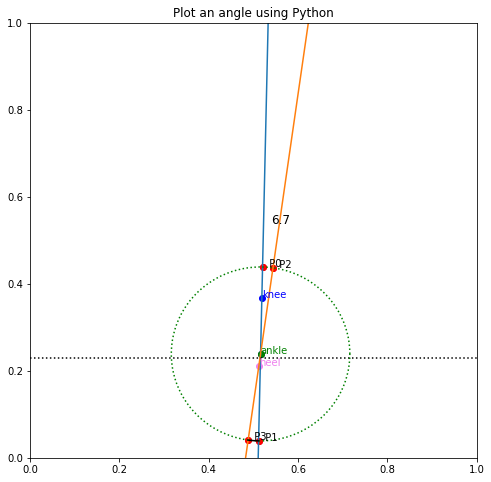

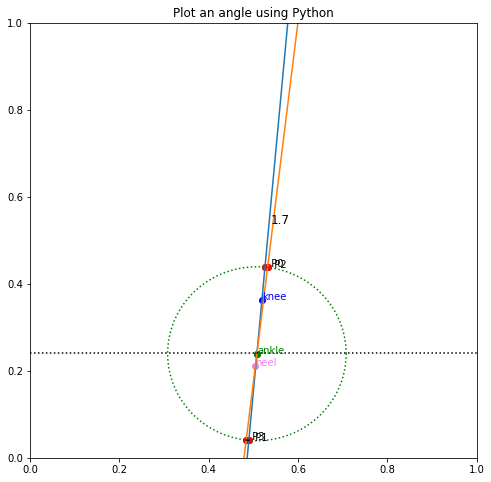

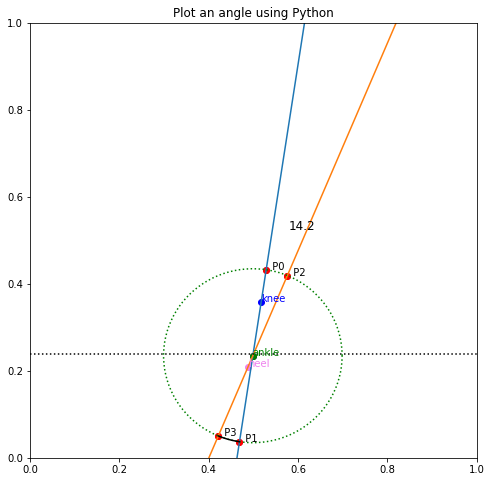

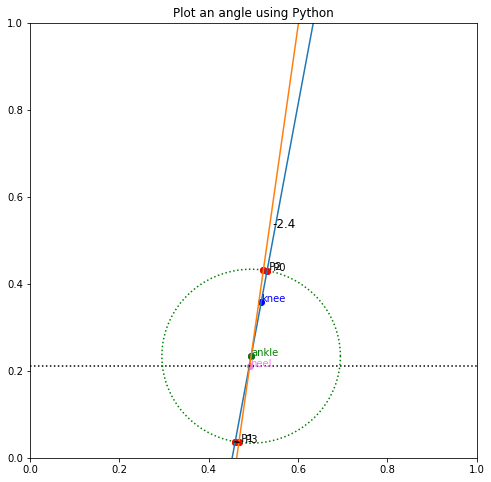

In [15]:
# print("NEUTRAL FRAMES:")
# for i,frame_step in enumerate(neutral_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in neutral_list[0]:
        plot = drawAngle(f, False)
    print("\n\n")
except:
    print("No Values")



### Supination

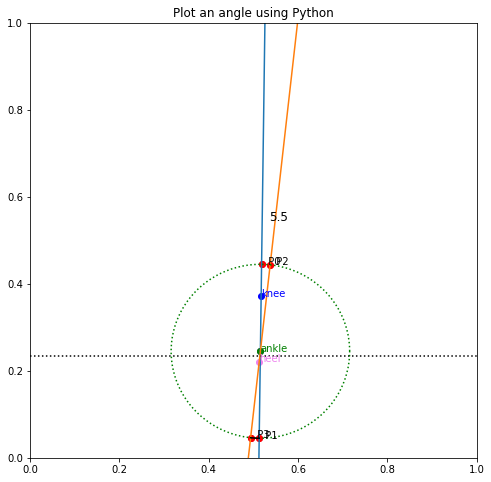

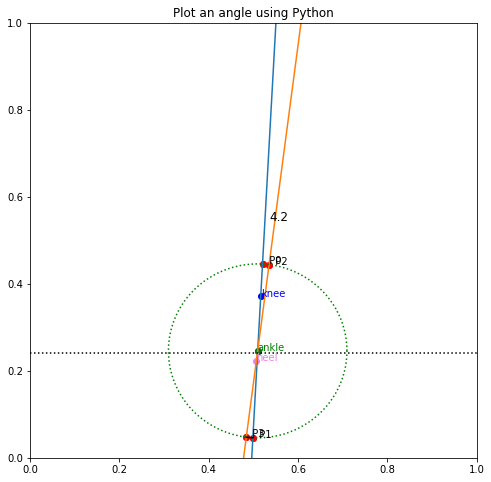

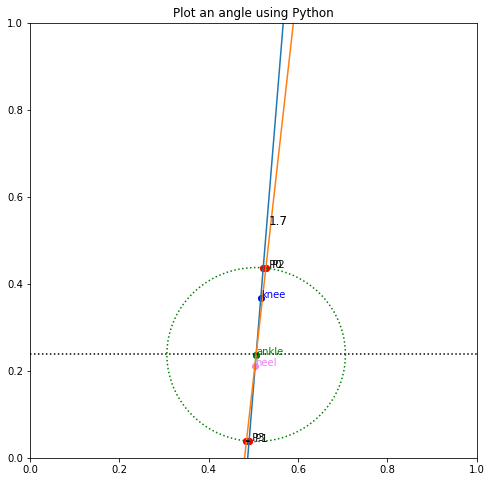

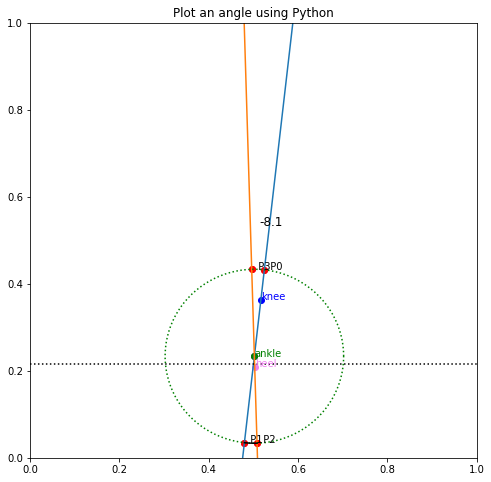

In [16]:
# for i,frame_step in enumerate(supination_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in supination_list[0]:
        drawAngle(f)
    print("\n\n")
except:
    print("No Values")

### Pronation

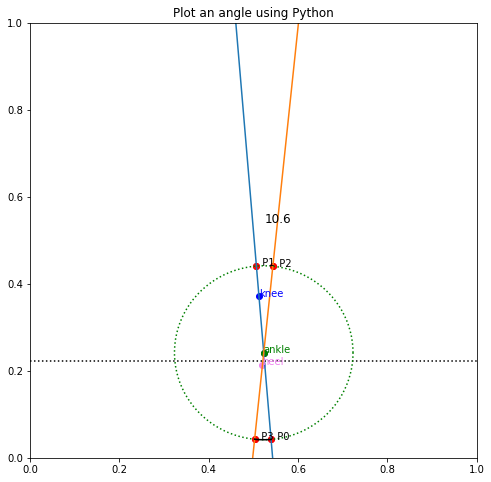

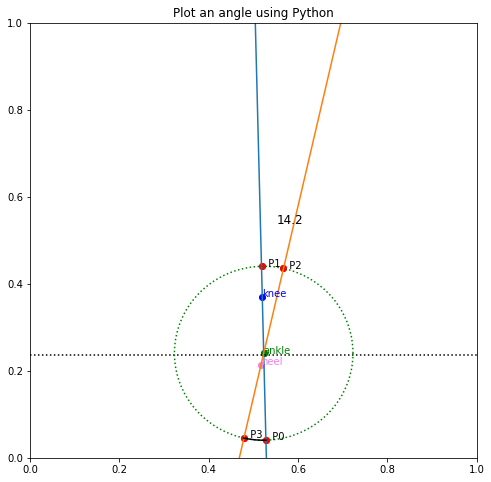

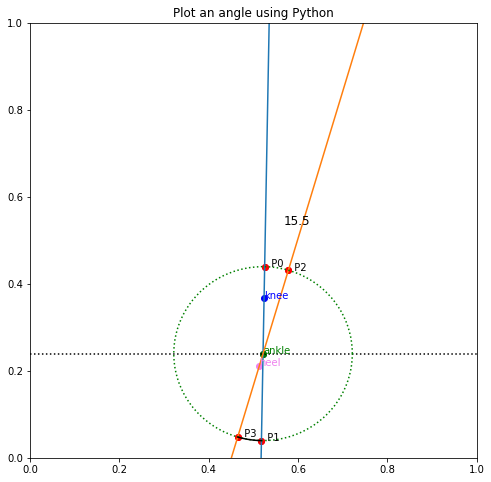

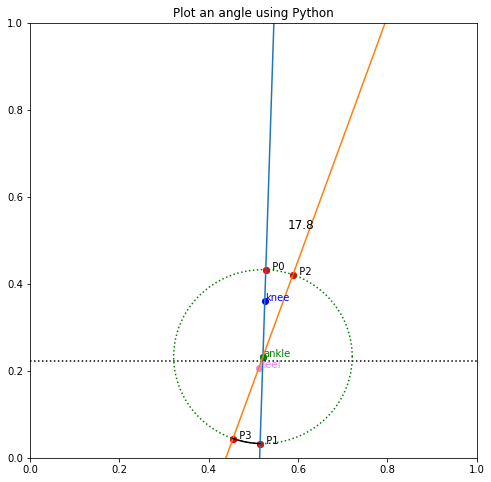

In [17]:
# for i,frame_step in enumerate(pronation_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_list[0]:
        drawAngle(f)
        print("\n\n")
except Exception as e:
    print(e)

### Strong Pronation

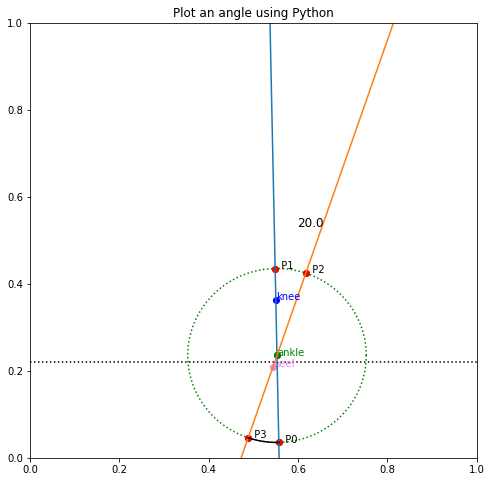

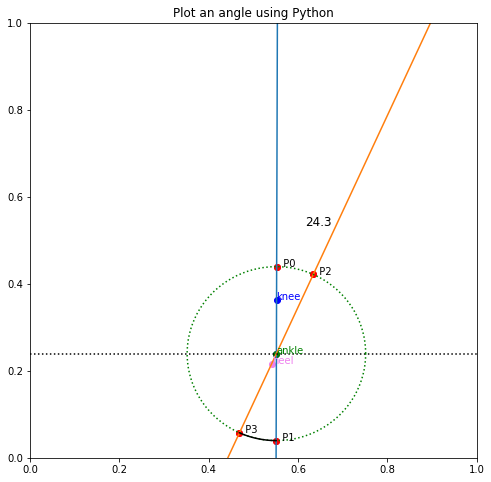

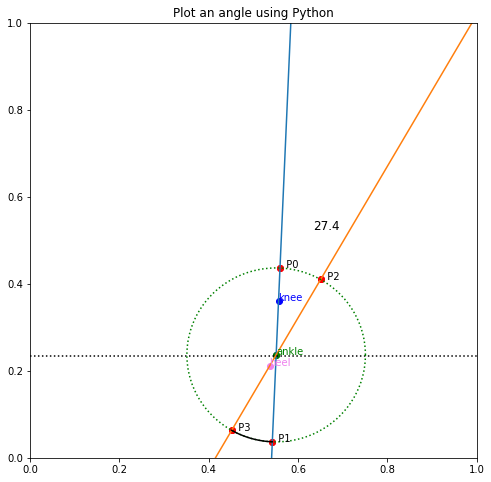

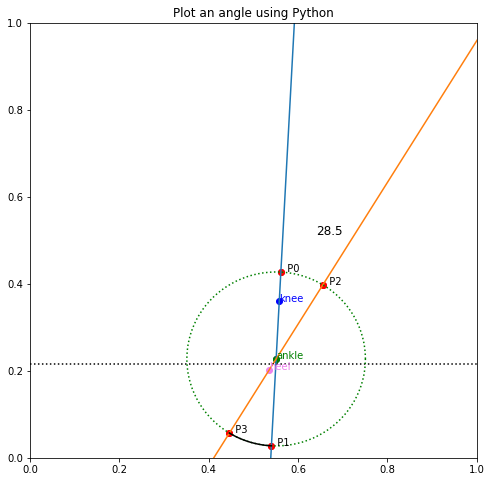

In [18]:
# for i,frame_step in enumerate(pronation_strong_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_strong_list[0]:
        drawAngle(f)
        print("\n\n")
except:
    print("No Values")

### Winkel Verlauf

In [19]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
df["angle"]

fig_knee = px.line(df, y="angle", title='Angle')

fig_knee.show()

## Analysis Result (1 Run)

In [20]:
average_overall = sum(average_list_all) / len(average_list_all)
median = bold(statistics.median(np.round(average_list_all, 1)))
result_pronation_pattern = checkThresholds(0, average_overall, False)
print(f'The runners left foot has a average value of {blue(bold(np.round(average_overall, 2)))} degree at step-out.')
print(f'The Median of the averaged steps the Runner took is {blue(median)}.')
print(f'Thats considered as {blue(bold(result_pronation_pattern))}.')   

The runners left foot has a average value of 6.77 degree at step-out.
The Median of the averaged steps the Runner took is 6.1.
Thats considered as Neutral.


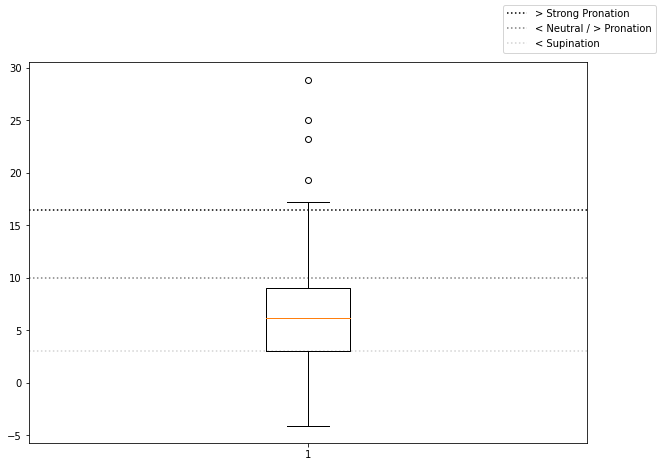

In [21]:
fig = plt.figure(figsize =(10, 7))
 
plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
plt.boxplot(average_list_all)
fig.legend()
plt.show()

## Foot Attachment Pattern

In [31]:
result_foot_pattern = ""

foot_x_max = df["x_left_foot_index"].max()
foot_is_front_df = df[df["x_left_foot_index"] > foot_x_max * 0.7]

#print(foot_is_front_df.head())

#print(foot_x_max)

safed_index = -1
start_index = -1
heel_counter = 0
middle_counter = 0
index_counter = 0

for i, row in foot_is_front_df.iterrows():
    if (safed_index == -1):
        start_index = i
        safed_index = i
        continue

    if (i - 1 == safed_index):
        safed_index = i
        continue
    else:
        single_swing_df = foot_is_front_df.loc[start_index: safed_index, ["y_left_foot_index", "y_left_heel", "x_left_foot_index"]]
        max_id_swing = single_swing_df["x_left_foot_index"].idxmax()
        #print("MAXSWING:", single_swing_df["x_left_foot_index"].idxmax())
        differnce_on_max_swing = single_swing_df.loc[[max_id_swing]].diff(axis=1)["y_left_heel"].values[0]
        # print(differnce_on_max_swing)
        # avg_difference_df = single_swing_df.diff(axis=1)
        # avg_difference = avg_difference_df["y_left_heel"].mean()

        if (differnce_on_max_swing < 0):
            heel_counter += 1
        elif (differnce_on_max_swing > 0):
            index_counter += 1
            #print(max_id_swing)
        else:
            middle_counter += 1


        #print(avg_difference)
        #if (avg_difference > -0.0051):
            #print(str(start_index) + "-" + str(safed_index), avg_difference)
        safed_index = i
        start_index = i
        continue
        #print(foot_is_front_df.loc[[safed_index]]["y_left_foot_index"].values[0])
        if (foot_is_front_df.loc[[safed_index]]["y_left_foot_index"].values[0] > foot_is_front_df.loc[[safed_index]]["y_left_heel"].values[0]):
            heel_counter += 1
            print("INDEX:",safed_index, " ||||||  Difference:", foot_is_front_df.loc[[safed_index]]["y_left_foot_index"].values[0]- foot_is_front_df.loc[[safed_index]]["y_left_heel"].values[0])

        elif (foot_is_front_df.loc[[safed_index]]["y_left_foot_index"].values[0] < foot_is_front_df.loc[[safed_index]]["y_left_heel"].values[0]):
            index_counter += 1

        else:
            middle_counter += 1
        safed_index = i

##print("HEEL: ", heel_counter)
#print("MIDDLE:", middle_counter)
#print("INDEX:", index_counter)

sum_counter = heel_counter + middle_counter + index_counter


result_foot_pattern = "Fersenläufer: " + str(heel_counter/sum_counter*100) + " %\n"
result_foot_pattern += "Mittelfußläufer: " + str(middle_counter/sum_counter*100) + "%\n"
result_foot_pattern += "Vorfußläufer: " + str(index_counter/sum_counter*100) + "%"

# result_foot_pattern

foot_is_front_df.head(40)


,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index,angle
0,1,0.723596,0.479980,0.548917,0.000132,0.707509,0.483800,0.429650,0.000954,0.715222,...,0.284575,0.675060,0.196673,0.528145,0.014531,0.672883,0.235611,0.458082,0.171472,4.2
1,0,0.726037,0.485146,0.546191,0.000191,0.729643,0.484793,0.426466,0.001010,0.694822,...,0.266858,0.656864,0.199956,0.528071,0.014149,0.706482,0.231654,0.464884,0.160278,5.9
10,-9,0.722667,0.473216,0.541185,0.000377,0.693268,0.471628,0.423971,0.000872,0.793276,...,0.180571,0.669509,0.220421,0.525484,0.012094,0.676611,0.212964,0.478753,0.121073,-2.6
11,-10,0.729742,0.478155,0.537885,0.000418,0.692701,0.478155,0.416525,0.000956,0.813611,...,0.173946,0.694448,0.215645,0.525675,0.011930,0.672731,0.213850,0.478743,0.117471,-6.2
12,-11,0.735216,0.486666,0.536955,0.000435,0.692593,0.487334,0.417211,0.000987,0.809244,...,0.165903,0.791219,0.213917,0.525228,0.012195,0.597500,0.214559,0.472209,0.113684,-5.0
13,-12,0.743293,0.492598,0.536776,0.000480,0.691029,0.495077,0.418004,0.001196,0.804250,...,0.155838,0.866271,0.214974,0.521680,0.011909,0.530683,0.219884,0.447689,0.110464,-0.4
14,-13,0.748462,0.491694,0.536173,0.000608,0.686421,0.494234,0.418855,0.001648,0.800061,...,0.147907,0.907950,0.230336,0.513034,0.012648,0.474948,0.237557,0.447398,0.111634,6.7
15,-14,0.750952,0.491252,0.535023,0.000753,0.687701,0.493254,0.416471,0.002642,0.797837,...,0.138687,0.922316,0.240835,0.505619,0.012995,0.442435,0.253576,0.449589,0.111205,1.7
16,-15,0.751570,0.487179,0.532439,0.000859,0.688306,0.490054,0.413283,0.003862,0.801093,...,0.128185,0.906156,0.238265,0.502213,0.012723,0.421887,0.270584,0.449384,0.105687,14.2
17,-16,0.750735,0.479092,0.531228,0.000850,0.690104,0.482041,0.414066,0.004474,0.802141,...,0.118085,0.865836,0.211879,0.497606,0.011799,0.412524,0.282334,0.447331,0.098547,-2.4


## Save Analysis in File

In [23]:
result_dict = {RUN: {"FOOT_PATTERN": result_foot_pattern, "PRONATION": {"PATTERN": result_pronation_pattern, "MEAN_ALL": average_overall,"MEAN_STEPS": average_list_all}}}
saveAnalysis(RUN, result_dict)

## Summary of all Run's

In [24]:
run_list = []
for fileName in csvFiles:
    try:
        pre, ext = os.path.splitext(fileName)
        run = loadAnalysis(pre)
        run_list.append(run)
    except:
        print("Error")
len(run_list)

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


8

Joggen_8
Fersenläufer: 96.55172413793103 %
Mittelfußläufer: 0.0%
Vorfußläufer: 3.4482758620689653%
#########################
Joggen_1
Fersenläufer: 100.0 %
Mittelfußläufer: 0.0%
Vorfußläufer: 0.0%
#########################
Joggen_2
Fersenläufer: 100.0 %
Mittelfußläufer: 0.0%
Vorfußläufer: 0.0%
#########################
Joggen_7
Fersenläufer: 89.47368421052632 %
Mittelfußläufer: 0.0%
Vorfußläufer: 10.526315789473683%
#########################
Joggen_6
Fersenläufer: 82.0 %
Mittelfußläufer: 0.0%
Vorfußläufer: 18.0%
#########################
Joggen_4
Fersenläufer: 92.3076923076923 %
Mittelfußläufer: 0.0%
Vorfußläufer: 7.6923076923076925%
#########################
Joggen_5
Fersenläufer: 90.12345679012346 %
Mittelfußläufer: 0.0%
Vorfußläufer: 9.876543209876543%
#########################


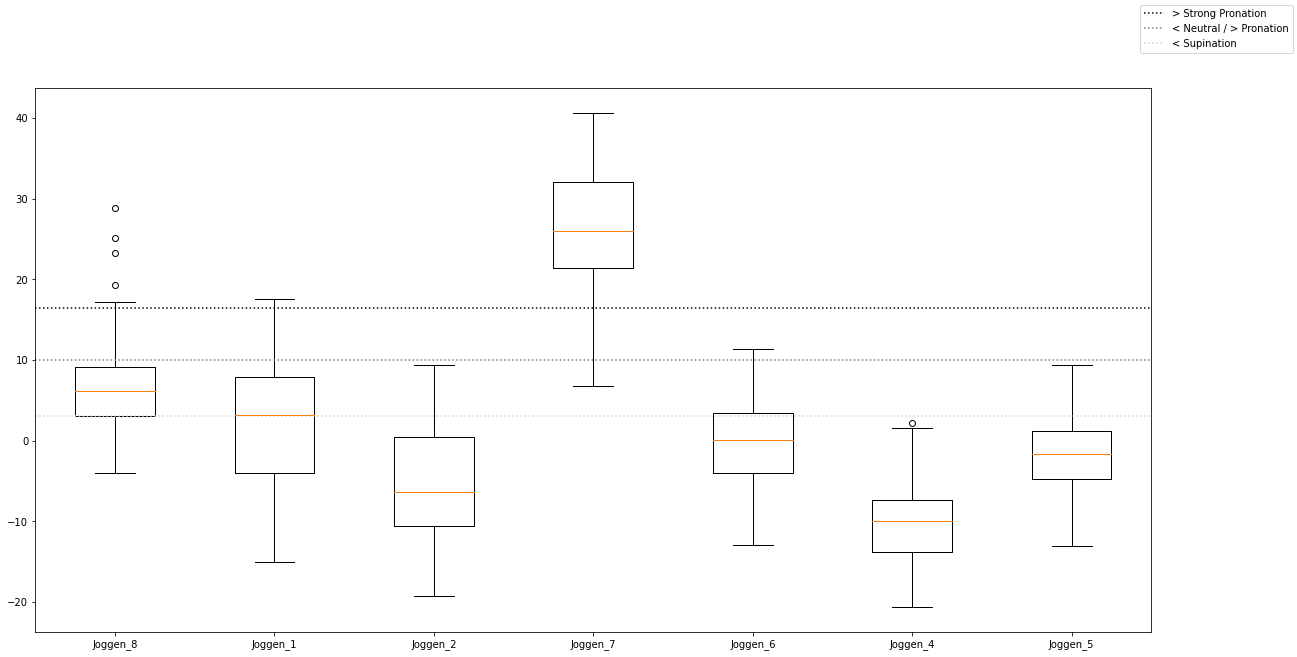

In [25]:
step_dict = {}
for i, r in enumerate(run_list):
    try: 
        # print(i)
        run_name = list(run_list[i].keys())[0]
        values = list(run_list[i].values())
        
        foot_pattern = values[0]["FOOT_PATTERN"]
        result = values[0]["PRONATION"]["PATTERN"]
        mean_all = values[0]["PRONATION"]["MEAN_ALL"]
        mean_steps = values[0]["PRONATION"]["MEAN_STEPS"]
        print(list(run_list[i].keys())[0])
        print(foot_pattern)
        print("#########################")

        step_dict[run_name] = mean_steps

    except Exception as e:
        pass 
        # print("Error1: ", e)

try:
    #fig = plt.figure(figsize =(20, 10))
    fig, ax = plt.subplots(figsize =(20, 10))
    ax.boxplot(step_dict.values())
    ax.set_xticklabels(step_dict.keys())
    plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
    plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
    plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
    fig.legend()
    plt.show()
except Exception as e:
    pass
    #print("Error2: ", e)